In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

train_data_loaded = pd.read_csv('../data/train_data_2024-08-01.csv')

X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']

# KFold-Konfiguration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definieren des F-beta-Scores mit beta = 2
beta = 2
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

##Parameter für Hyperparametertuning
logistic__C = [0.001, 0.01, 0.1, 1, 10, 100]
logistic__max_iter = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]
logistic__tol = [1e-4, 1e-3, 1e-2]
logistic__penalty = ['l2', 'l1', 'elasticnet']
logistic__solver = ['lbfgs', 'liblinear', 'sag', 'saga']

#logistic__C: Dieser Hyperparameter steuert die Stärke der Regularisierung. Niedrigere Werte bedeuten stärkere Regularisierung, was hilfreich sein kann, um Überanpassung zu vermeiden, besonders wenn die Daten unbalanciert sind und das Modell dazu neigt, die Mehrheitsklasse zu bevorzugen.  
#logistic__penalty: Bestimmt den Typ der Regularisierung. 'l2' ist die Standardoption, die dazu neigt, die Gewichte gleichmäßig zu verkleinern, was bei unbalancierten Daten nützlich sein kann, um die Komplexität des Modells zu kontrollieren.  
#logistic__solver: Der 'lbfgs'-Solver unterstützt die L2-Regularisierung und ist effizient für kleine Datensätze. Die Wahl des Solvers kann die Konvergenzgeschwindigkeit und die Handhabung von unbalancierten Daten beeinflussen.  
#logistic__max_iter: Die maximale Anzahl von Iterationen, die der Solver für die Konvergenz durchführt. Bei unbalancierten Daten kann es notwendig sein, diesen Wert zu erhöhen, um eine bessere Anpassung zu erzielen.  
#logistic__tol: Die Toleranz für das Stoppkriterium. Eine feinere Toleranz kann bei unbalancierten Daten helfen, indem sie sicherstellt, dass das Modell gründlich optimiert wird. 


C_value: 0.001 Fbeta Score Logistische Regression (k-fold): 0.47893934414620015
C_value: 0.01 Fbeta Score Logistische Regression (k-fold): 0.4816753425131036
C_value: 0.1 Fbeta Score Logistische Regression (k-fold): 0.481896819679406
C_value: 1 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
C_value: 10 Fbeta Score Logistische Regression (k-fold): 0.481639459626136
C_value: 100 Fbeta Score Logistische Regression (k-fold): 0.48158515040881983


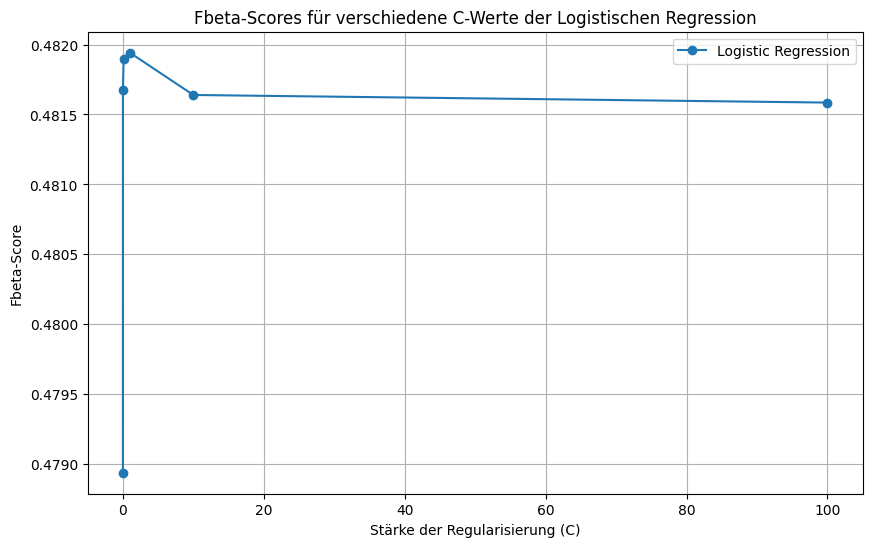

In [4]:
logReg_logistic__C = []

for C_value in logistic__C:
    log_reg = LogisticRegression(C=C_value, max_iter=5000, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"C_value: {C_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_logistic__C.append(fbeta_reg.mean())
    

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__C, logReg_logistic__C, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene C-Werte der Logistischen Regression')
plt.xlabel('Stärke der Regularisierung (C)')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

max_iter_value: 100 Fbeta Score Logistische Regression (k-fold): 0.47968955745805103


/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

max_iter_value: 1000 Fbeta Score Logistische Regression (k-fold): 0.48087033122142764
max_iter_value: 2000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 3000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 4000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 5000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 6000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 7000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 8000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 9000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 10000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
max_iter_value: 11000 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672


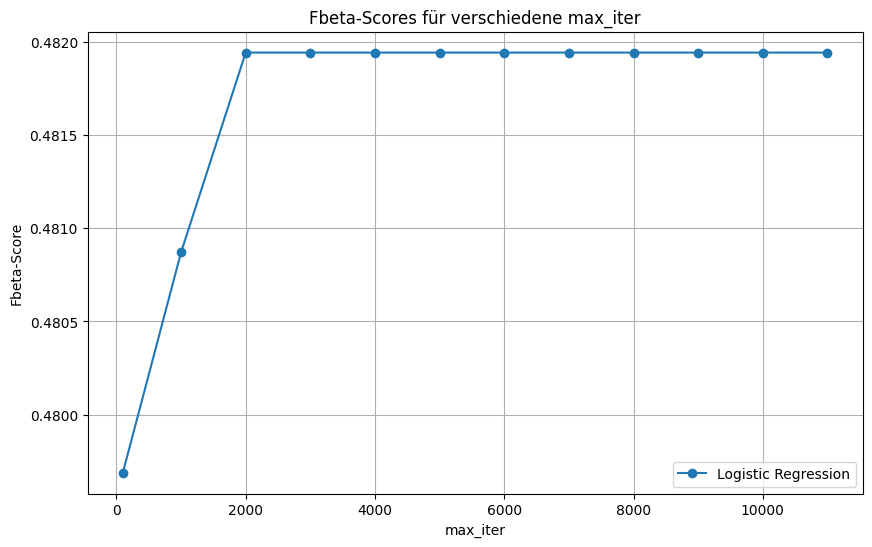

In [12]:

logReg_max_iter = []
for max_iter_value in logistic__max_iter:
    log_reg = LogisticRegression(max_iter=max_iter_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"max_iter_value: {max_iter_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_max_iter.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__max_iter, logReg_max_iter, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene max_iter')
plt.xlabel('max_iter')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

tol_value: 0.0001 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
tol_value: 0.001 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
tol_value: 0.01 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672


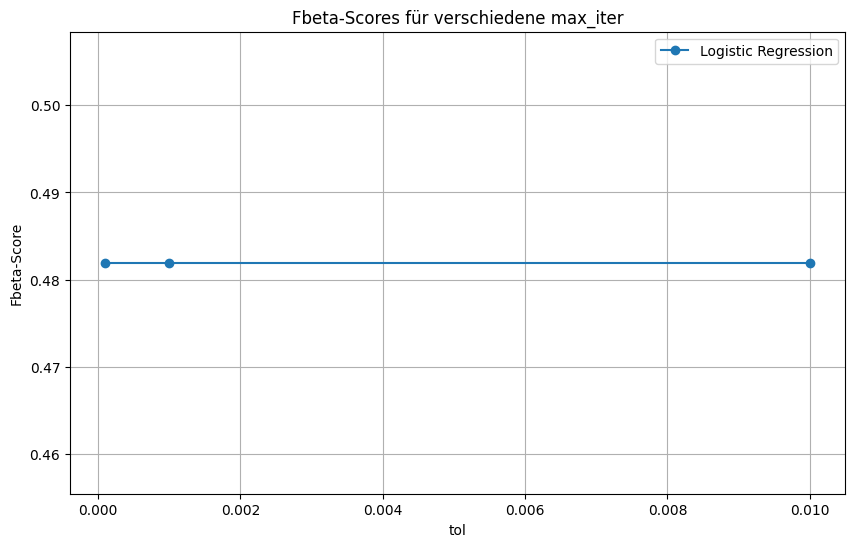

In [6]:
logReg_tol = []
for tol_value in logistic__tol:
    log_reg = LogisticRegression(max_iter=5000, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"tol_value: {tol_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_tol.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__tol, logReg_tol, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene max_iter')
plt.xlabel('tol')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
logReg_penalty = []
for penalty_value in logistic__penalty:
    log_reg = LogisticRegression(max_iter=5000, solver='liblinear', penalty=penalty_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"penalty_value: {penalty_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_penalty.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__penalty, logReg_penalty, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene penalty')
plt.xlabel('penalty')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


penalty_value: l2 Fbeta Score Logistische Regression (k-fold): 0.4819415177526672


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.


solver_value: lbfgs Fbeta Score Logistische Regression (k-fold): 0.4819415177526672
solver_value: liblinear Fbeta Score Logistische Regression (k-fold): 0.48240489744404214


/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver_value: sag Fbeta Score Logistische Regression (k-fold): 0.2858397880520483


/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver_value: saga Fbeta Score Logistische Regression (k-fold): 0.47127067554055324


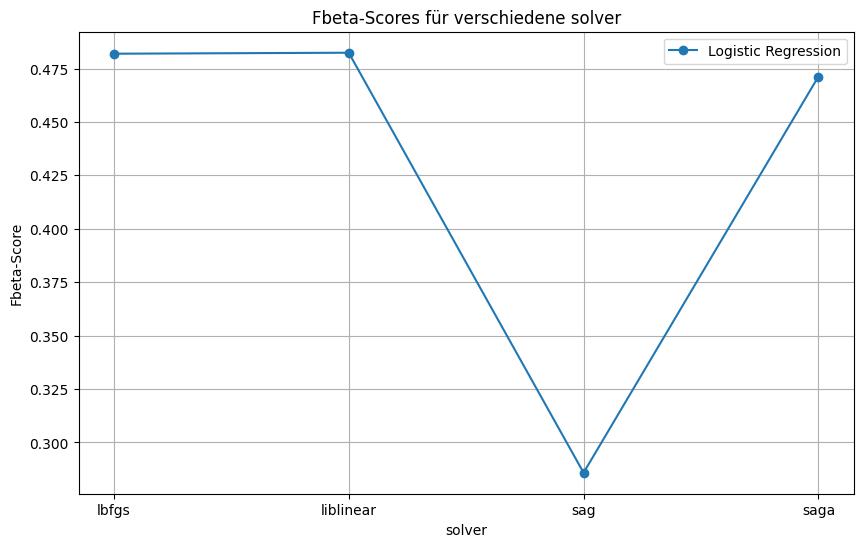

In [8]:
logReg_solver = []
for solver_value in logistic__solver:
    log_reg = LogisticRegression(max_iter=5000, solver=solver_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"solver_value: {solver_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_solver.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__solver, logReg_solver, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene solver')
plt.xlabel('solver')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()
